# Markov Chains
## Recurrient and Transient Properties Demostrated with Python Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [2]:
def One_Dim_Random_Walk(n):
    state, count = 0, 0
    #We start at the state 0, and we want to reach 0 again 
    for i in range(n):
        step = random.choice(['W', 'E'])
        #Move left or right with equal probability 
        if step == 'W':
            state = state - 1
        if step == 'E':
            state = state + 1
        count += 1
        if i > 1 and state == 0:
        #Once we leave the state 0, if we return to 0, then the function will stop
            break
    return (state, count)

Let us run One_Dim_Random_Walk(n) once as a test case. 
We will pass a parameter of n = 100000 which means this one dimensional random walk will take **at most** 100,000 steps.
If *x* represent the the number of steps (the count) that it takes for the random walk to return to the state 0, then 0 < x <= 100000.

In [3]:
print(One_Dim_Random_Walk(100000))

(0, 4)


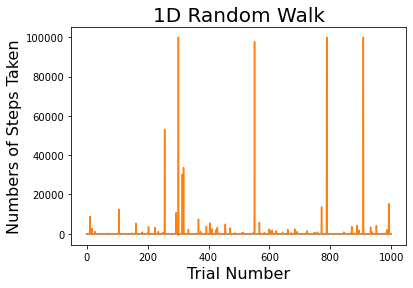

In [4]:
# This will consider 1000 trials where we walk 100,000 steps or until we hit the state 0 again

sims = [One_Dim_Random_Walk(100000) for x in range(1000)]

plt.plot(sims)
plt.title('1D Random Walk', fontsize=20)
plt.xlabel('Trial Number', fontsize=16)
plt.ylabel('Numbers of Steps Taken', fontsize=16)
plt.show()

This graph represents a 1,000 trials of the One_Dim_Random_Walk() function.
The majority of the trials are clustered by the x-axis, for those trials quickly returned to the origin in only a few steps.
The importance of this graph are the spikes illustrated; they represent trials that took thousands of steps to return to the origin or never returned to the origin (those trials where y = 100000).
However, the overwhelming majority of trials eventually returned to the origin.

In [5]:
def Two_Dim_Random_Walk(n):
    (x, y) = (0, 0)
    count = 0
    for i in range(n):
        # If the coordinate returns to the origin, stop
        if i > 1 and (x, y) == (0, 0):
            break
        # Randomized step based on cardinal directions
        step = random.choice(['N', 'S', 'E', 'W'])
        if step == 'N':
            y += 1
        elif step == 'S':
            y -= 1
        elif step == 'E':
            x += 1
        elif step == 'W':
            x -= 1
        count += 1
    return (x, y, count)

Similar to One_Dim_Random_Walk(), Two_Dim_Random_Walk() returns the coordinate location (x, y) and the number of steps it took to reach said coordinate.
Likewise, the hyothesis indicates the majority of these cases will return to the origin (0, 0) within a finite number of steps.

In [6]:
for i in range(10):
    walk = Two_Dim_Random_Walk(20)
    print(walk, 'Distance from the origin', abs(walk[0])), abs(walk[1])

(-1, -3, 20) Distance from the origin 1
(4, -2, 20) Distance from the origin 4
(-6, -2, 20) Distance from the origin 6
(0, 0, 2) Distance from the origin 0
(1, 7, 20) Distance from the origin 1
(0, -4, 20) Distance from the origin 0
(3, 1, 20) Distance from the origin 3
(0, 0, 4) Distance from the origin 0
(0, 0, 2) Distance from the origin 0
(0, 0, 2) Distance from the origin 0


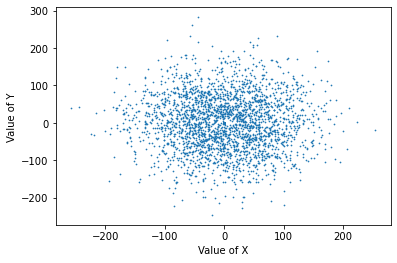

In [7]:

max_number_of_steps = 10000
number_of_trials = 10000

sims = [Two_Dim_Random_Walk(max_number_of_steps) for x in range(number_of_trials)]
# The format of item in sims is (x-coordinate, y-coordinate, count)
list_x = [item[0] for item in sims]
list_y = [item[1] for item in sims]
list_c = [item[2] for item in sims]
# Convert to numpy arrays for optimization
x, y = np.array(list_x), np.array(list_y)
plt.plot(x, y, linestyle = '', marker = 'o', markersize = 0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.show()


This scatterplot is not as impressive as the one-dimensional graph, for there were many trials that never return to the origin in the given, finite number of steps.
Despite this, the majority of trials return to the origin.

In [8]:
# Determine how many trials reached the maximum number of steps
failure_count = list_c.count(max_number_of_steps)
success_count = number_of_trials - failure_count
print('Out of ' + str(number_of_trials) + ' trials, ' + str(success_count) + " returned to the origin")

Out of 10000 trials, 7393 returned to the origin
